In [3]:
##### Problem 1
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# simulate BM path
N = 3650
zt = np.cumsum(np.random.normal(size=N-1) * np.sqrt(1/N))
zt = np.insert(zt,0,0)

In [7]:
# geometric BM function
def gbm(t, wt, mu, sigma, s0=1):
    return s0 * np.exp( sigma*wt + (mu - 1/2*sigma**2)*t )

In [8]:
# simulate geometric BM path
mu = 0.06
sigma = 0.2
times = [0+i*(1/N) for i in range(1,N+1)]
times.insert(0,0)
st = [gbm(times[t], zt[t], mu, sigma) for t in range(N)]

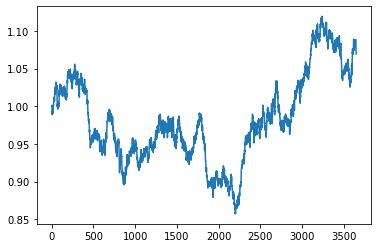

In [9]:
plt.plot(st)

In [10]:
# daily continuously compounded returns
st0 = st[:-1]
st1 = st[1:]
rt = np.log(st1) - np.log(st0)

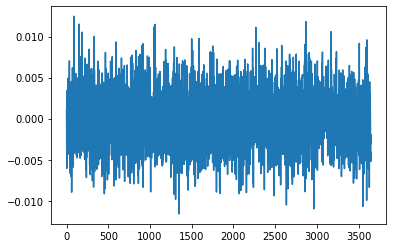

In [14]:
plt.plot(rt)

In [15]:
rt_ymean = 365*np.mean(rt)
rt_ystdv = np.sqrt(365)*np.std(rt)
print("annualized mean of daily log-returns: ", rt_ymean, "\nannualized standard deviation of daily log-returns: ", rt_ystdv)

annualized mean of daily log-returns:  0.006690726673653127 
annualized standard deviation of daily log-returns:  0.06423418209389666


In [1]:
##### Problem 2
import pandas as pd

In [27]:
idx = pd.period_range('1950-01-01','2020-12-31',freq='D')
N = len(idx)
zt = np.cumsum(np.random.normal(size=N-1) * np.sqrt(1/N))
zt = np.insert(zt,0,0)
times = [0+i*(1/N) for i in range(1,N+1)]
times.insert(0,0)
st = [gbm(times[t], zt[t], mu, sigma) for t in range(N)]

In [33]:
st = pd.Series(st,index=idx)
print('The sample has',N,'observations.')

The sample has 25933 observations.


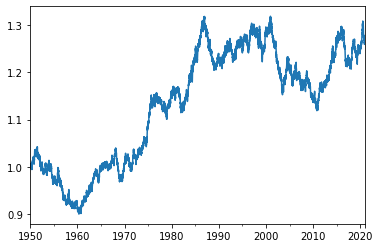

In [31]:
st.plot()

In [50]:
st_monavg = st.resample(rule='M').mean()

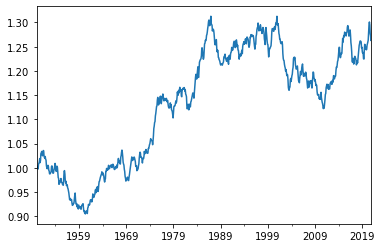

In [51]:
st_monavg.plot()